In [1]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path = "./data"
all_files = glob.glob(path + "/*.csv")

In [3]:
def rank(path):
    return int(path.split('/')[2].split('.')[0][5:])

In [4]:
all_files = sorted(all_files, key=rank)

In [5]:
li = []
pid_base = 0
for filename in all_files:
    df = pd.read_csv(filename, index_col=None)
    df['pid'] = df['pid'] + pid_base
    li.append(df)
    pid_base += 1000

dfs = pd.concat(li, axis=0, ignore_index=True)

In [6]:
dfs.shape

(66346428, 9)

In [7]:
dfs.head()

,pid,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name
0,0,0,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook
1,0,1,Britney Spears,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Toxic,spotify:album:0z7pVBGOD7HCIB7S8eLkLI,198800,In The Zone
2,0,2,Beyoncé,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,spotify:artist:6vWDO969PvNqNYHIOW5v0m,Crazy In Love,spotify:album:25hVFAxTlDvXbx2X2QkUkE,235933,Dangerously In Love (Alben für die Ewigkeit)
3,0,3,Justin Timberlake,spotify:track:1AWQoqb9bSvzTjaLralEkT,spotify:artist:31TPClRtHm23RisEBtV3X7,Rock Your Body,spotify:album:6QPkyl04rXwTGlGlcYaRoW,267266,Justified
4,0,4,Shaggy,spotify:track:1lzr43nnXAijIGYnCT8M8H,spotify:artist:5EvFsr3kj42KNv97ZEnqij,It Wasn't Me,spotify:album:6NmFmPX56pcLBOFMhIiKvF,227600,Hot Shot


In [8]:
dfs.tail()

,pid,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name
66346423,999999,105,Banda Carnaval,spotify:track:0PX1p94jkveuUOZ31rjHak,spotify:artist:6LOvxDn71T0wWhCDNcXcUj,La Doble Cara,spotify:album:4EsRdUztvnblHNgu53aqZr,214706,Las Vueltas De La Vida
66346424,999999,106,Edwin Luna y La Trakalosa de Monterrey,spotify:track:3wqJC3yJBN2eSKVuEpQj9w,spotify:artist:4LFOoXhMhnq9U8VsZkSwxl,Adicto a la Tristeza,spotify:album:0zo3LNmIZJr5BeQujgCB2Y,198133,La Banda Grande de la Sultana del Norte
66346425,999999,107,Edwin Luna y La Trakalosa de Monterrey,spotify:track:1YcTGCPO4dRnFWVBvuWEKa,spotify:artist:4LFOoXhMhnq9U8VsZkSwxl,Mi Nombre Entre Tus Dientes (feat. Big Javy),spotify:album:0zo3LNmIZJr5BeQujgCB2Y,208946,La Banda Grande de la Sultana del Norte
66346426,999999,108,Edwin Luna y La Trakalosa de Monterrey,spotify:track:0nAyEpfdIFHTXkIISI3Ke7,spotify:artist:4LFOoXhMhnq9U8VsZkSwxl,Como los Gatos (feat. Xitlali Sarmiento),spotify:album:0zo3LNmIZJr5BeQujgCB2Y,182093,La Banda Grande de la Sultana del Norte
66346427,999999,109,Edwin Luna y La Trakalosa de Monterrey,spotify:track:35oKShiPehjQg7y1iTIQ0E,spotify:artist:4LFOoXhMhnq9U8VsZkSwxl,Broche de Oro,spotify:album:0zo3LNmIZJr5BeQujgCB2Y,216226,La Banda Grande de la Sultana del Norte


In [9]:
dfs.isnull().sum()

pid             0
pos             0
artist_name    13
track_uri       0
artist_uri      0
track_name      2
album_uri       0
duration_ms     0
album_name     15
dtype: int64

In [10]:
dfs['track_name'] = dfs['track_name'].apply(lambda x: str(x).strip().lower())

In [11]:
dfs['artist_name'] = dfs['artist_name'].apply(lambda x: str(x).strip().lower())
dfs['album_name'] = dfs['album_name'].apply(lambda x: str(x).strip().lower())

In [12]:
playlist_ct = dfs.groupby('pid').agg({'pid': 'count',
                                     'duration_ms':'mean',
                                    'album_name': 'nunique',
                                     'artist_name': 'nunique'})
playlist_ct = playlist_ct.rename(columns={'artist_name':'artist_ct',
                                     'album_name':'album_ct',
                                     'pid':'pid_ct'})


In [13]:
playlist_ct = playlist_ct.sort_values('pid_ct', ascending=False)

In [14]:
playlist_ct['duration_ms'] = playlist_ct['duration_ms'] / 1000 / 60

In [15]:
playlist_ct.head()

,pid_ct,duration_ms,album_ct,artist_ct
pid,,,,
864737,376,4.320571,236,164
719970,250,3.805709,181,140
965289,250,3.805110,197,129
148694,250,3.778119,130,54
286573,250,2.868168,110,35


In [109]:
playlist_ct.to_csv('./output/playlist_level.csv')

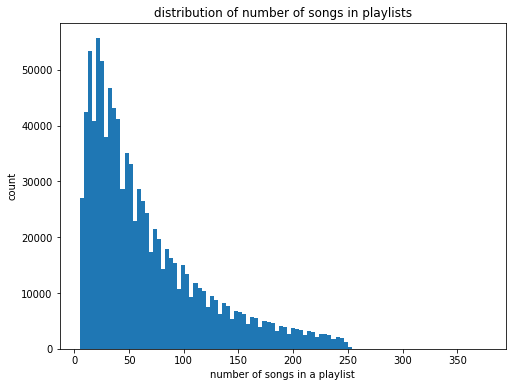

In [16]:
plt.figure(figsize=(8,6))
plt.title('distribution of number of songs in playlists')
plt.ylabel('count')
plt.xlabel('number of songs in a playlist')
plt.hist(playlist_ct['pid_ct'], bins=100)
plt.show()

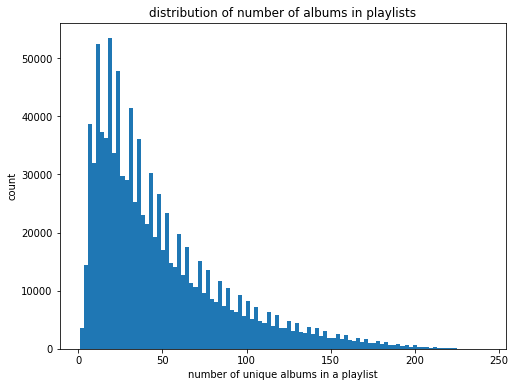

In [17]:
plt.figure(figsize=(8,6))
plt.title('distribution of number of albums in playlists')
plt.ylabel('count')
plt.xlabel('number of unique albums in a playlist')
plt.hist(playlist_ct['album_ct'], bins=100)
plt.show()

In [18]:
playlist_ct.head()

,pid_ct,duration_ms,album_ct,artist_ct
pid,,,,
864737,376,4.320571,236,164
719970,250,3.805709,181,140
965289,250,3.805110,197,129
148694,250,3.778119,130,54
286573,250,2.868168,110,35


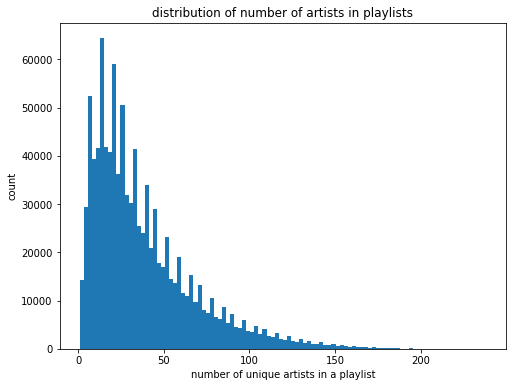

In [19]:
plt.figure(figsize=(8,6))
plt.title('distribution of number of artists in playlists')
plt.ylabel('count')
plt.xlabel('number of unique artists in a playlist')
plt.hist(playlist_ct['artist_ct'], bins=100)
plt.show()

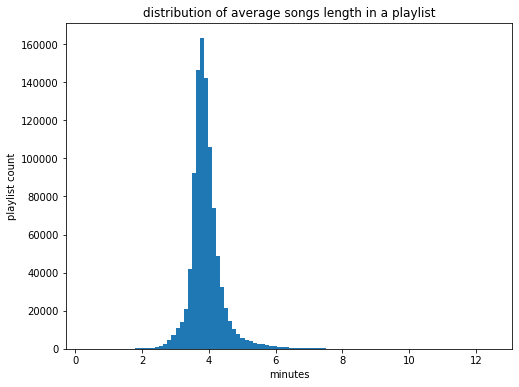

In [20]:
plt.figure(figsize=(8,6))
plt.title('distribution of average songs length in a playlist')
plt.xlabel('minutes')
plt.ylabel('playlist count')
plt.hist(playlist_ct['duration_ms'][playlist_ct['duration_ms'] <= 12.5], bins=100)
plt.show()

In [21]:
playlist_ct['pid_ct'][:20]

pid
864737    376
719970    250
965289    250
148694    250
286573    250
882450    250
600107    250
141813    250
809471    250
764059    250
849288    250
489564    250
769775    250
51618     250
924453    250
962571    250
981676    250
533890    250
983778    250
993912    250
Name: pid_ct, dtype: int64

In [22]:
playlist_ct[:20]

,pid_ct,duration_ms,album_ct,artist_ct
pid,,,,
864737,376,4.320571,236,164
719970,250,3.805709,181,140
965289,250,3.805110,197,129
148694,250,3.778119,130,54
286573,250,2.868168,110,35
882450,250,3.734574,19,14
600107,250,3.814732,185,128
141813,250,3.018771,114,54
809471,250,3.975941,169,105


In [99]:
track_ct = dfs.groupby(['track_uri', 'track_name']).agg({'track_name': 'count',
                                                       'pid':'nunique'})
track_ct = track_ct.rename(columns={'track_name':'track_ct',
                                   'pid':'pid_ct'})
track_ct = track_ct.sort_values('track_ct', ascending=False)
track_ct.head()

,,track_ct,pid_ct
track_uri,track_name,,
spotify:track:7KXjTSCq5nL1LoYtL7XAwS,humble.,46574,45394
spotify:track:1xznGGDReH1oQq0xzbwXa3,one dance,43447,41707
spotify:track:7yyRTcZmCiyzzJlNzGC9Ol,broccoli (feat. lil yachty),41309,40659
spotify:track:7BKLCZ1jbUBVqRi2FVlTVw,closer,41079,40629
spotify:track:3a1lNhkSLSkpJE4MSHpDu9,congratulations,39987,39577


In [113]:
track_ct.to_csv('./output/track_level.csv')

In [98]:
track_ct[:20]

,,track_ct,pid_ct
track_name,track_uri,,
humble.,spotify:track:7KXjTSCq5nL1LoYtL7XAwS,46574,45394
one dance,spotify:track:1xznGGDReH1oQq0xzbwXa3,43447,41707
broccoli (feat. lil yachty),spotify:track:7yyRTcZmCiyzzJlNzGC9Ol,41309,40659
closer,spotify:track:7BKLCZ1jbUBVqRi2FVlTVw,41079,40629
congratulations,spotify:track:3a1lNhkSLSkpJE4MSHpDu9,39987,39577
caroline,spotify:track:5hTpBe8h35rJ67eAWHQsJx,35202,34765
ispy (feat. lil yachty),spotify:track:2EEeOnHehOozLq4aS0n6SL,35138,34672
bad and boujee (feat. lil uzi vert),spotify:track:4Km5HrUvYTaSUfiSGPJeQR,34999,34157
xo tour llif3,spotify:track:7GX5flRQZVHRAGd6B4TmDO,34922,34048


In [101]:
track_ct1 = track_ct.reset_index()

In [102]:
track_ct1

,track_uri,track_name,track_ct,pid_ct
0,spotify:track:7KXjTSCq5nL1LoYtL7XAwS,humble.,46574,45394
1,spotify:track:1xznGGDReH1oQq0xzbwXa3,one dance,43447,41707
2,spotify:track:7yyRTcZmCiyzzJlNzGC9Ol,broccoli (feat. lil yachty),41309,40659
3,spotify:track:7BKLCZ1jbUBVqRi2FVlTVw,closer,41079,40629
4,spotify:track:3a1lNhkSLSkpJE4MSHpDu9,congratulations,39987,39577
...,...,...,...,...
2262287,spotify:track:1hjKpLKdiuYRY082UF3quN,hide me,1,1
2262288,spotify:track:1hjLagaRWzJwVBOKuLL9nC,she thinks i still care,1,1
2262289,spotify:track:4hHJof8n4Z3Hw5GkHxkZrJ,fat kids,1,1
2262290,spotify:track:1hjMy1ztIFTqSDwNFBL6gl,te vas,1,1


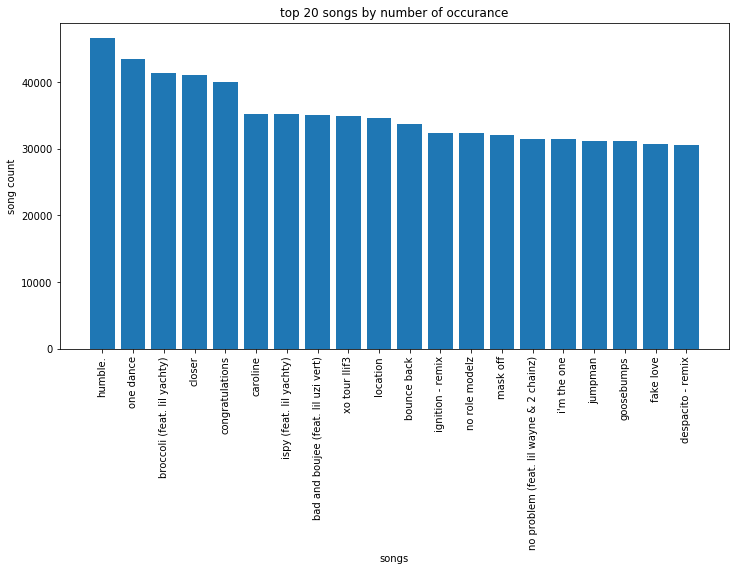

In [105]:
plt.figure(figsize=(12,6))
plt.title('top 20 songs by number of occurance')
plt.ylabel('song count')
plt.xlabel('songs')
plt.bar(track_ct1['track_name'][:20], track_ct1['track_ct'][:20].values)
plt.xticks(rotation=90)
plt.show()

In [39]:
artist_ct = dfs.groupby(['artist_name','artist_uri']).agg({'artist_name': 'count', 
                                                            'album_name': 'nunique',
                                                            'pid': 'nunique'})
artist_ct = artist_ct.rename(columns={'artist_name':'artist_ct',
                                     'album_name':'album_ct',
                                     'pid':'pid_ct'})
artist_ct = artist_ct.sort_values('artist_ct', ascending=False)

In [44]:
artist_ct = artist_ct.reset_index()

In [45]:
artist_ct.sort_values('pid_ct', ascending=False)[:20]

,artist_name,artist_uri,artist_ct,album_ct,pid_ct
0,drake,spotify:artist:3TVXtAsR1Inumwj472S9r4,846937,31,203345
3,rihanna,spotify:artist:5pKCCKE2ajJHZ9KAiaK11H,339570,59,150344
1,kanye west,spotify:artist:5K4W6rqBFWDnAN6FQUkS6x,413297,40,141223
4,the weeknd,spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ,316603,14,125236
2,kendrick lamar,spotify:artist:2YZyLoL8N0Wb9xBt1NhZWg,353624,30,120901
11,the chainsmokers,spotify:artist:69GGBxA162lTqCwzJG5jLp,223509,28,111562
6,ed sheeran,spotify:artist:6eUKZXaKkcviH0Ku9w2n3V,272116,34,111422
13,calvin harris,spotify:artist:7CajNmpbOovFoOoasH2HaY,203047,54,110881
10,beyoncé,spotify:artist:6vWDO969PvNqNYHIOW5v0m,230857,68,97468
18,maroon 5,spotify:artist:04gDigrS5kc9YWfZHwBETP,187029,28,97256


In [107]:
artist_ct[:20].to_csv('./output/artist_level.csv')

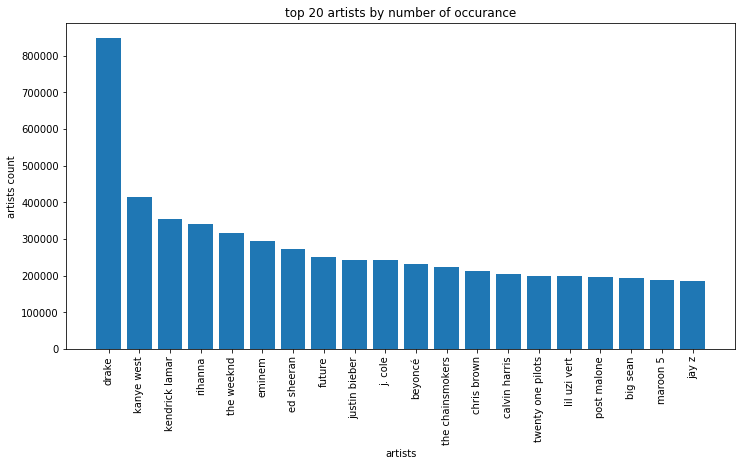

In [47]:
plt.figure(figsize=(12,6))
plt.title('top 20 artists by number of occurance')
plt.ylabel('artists count')
plt.xlabel('artists')
plt.bar(artist_ct['artist_name'][:20], artist_ct['artist_ct'][:20].values)
plt.xticks(rotation=90)
plt.show()

In [48]:
album_ct = dfs.groupby(['album_name', 'album_uri']).agg({'album_name': 'count',
                                         'pid': 'nunique'})
album_ct = album_ct.rename(columns={'album_name':'album_ct',
                                   'pid':'pid_ct'})
album_ct = album_ct.sort_values('album_ct', ascending=False)



,,album_ct,pid_ct
album_name,album_uri,,
stoney,spotify:album:5s0rmjP8XOPhP6HhqOhuyC,156488,81902
damn.,spotify:album:4eLPsYPBmXABThSJ821sqY,141638,65604
coloring book,spotify:album:71QyofYesSsRMwFOTafnhB,133050,63662
american teen,spotify:album:6kf46HbnYCZzP6rjvQHYzg,120946,57340
culture,spotify:album:2AvupjUeMnSffKEV05x222,120017,56641


In [49]:
album_ct = album_ct.reset_index()
album_ct.head()

,album_name,album_uri,album_ct,pid_ct
0,stoney,spotify:album:5s0rmjP8XOPhP6HhqOhuyC,156488,81902
1,damn.,spotify:album:4eLPsYPBmXABThSJ821sqY,141638,65604
2,coloring book,spotify:album:71QyofYesSsRMwFOTafnhB,133050,63662
3,american teen,spotify:album:6kf46HbnYCZzP6rjvQHYzg,120946,57340
4,culture,spotify:album:2AvupjUeMnSffKEV05x222,120017,56641


In [51]:
album_ct = album_ct[~album_ct['album_name'].isin(['÷', 'x'])]

In [111]:
album_ct.to_csv('./output/album_level.csv')

In [33]:
dfs.shape

(66346428, 9)

In [34]:
album_ct[:20]

,album_ct,pid_ct
album_name,,
views,208538,93162
stoney,156488,81902
greatest hits,147996,89125
more life,141877,64961
damn.,141639,65604
beauty behind the madness,136517,74173
coloring book,133080,63686
american teen,120946,57340
culture,120061,56670


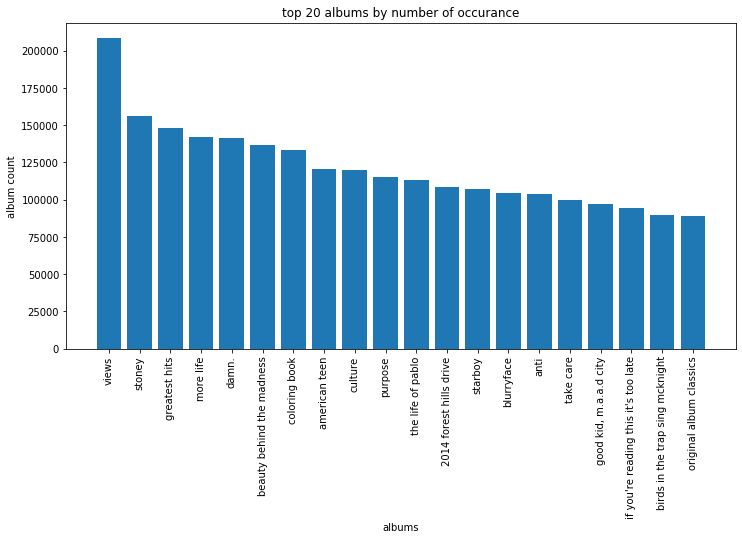

In [35]:
plt.figure(figsize=(12,6))
plt.title('top 20 albums by number of occurance')
plt.ylabel('album count')
plt.xlabel('albums')
plt.bar(album_ct['album_ct'][:20].index, album_ct['album_ct'][:20].values)
plt.xticks(rotation=90)
plt.show()

In [36]:
total_key = ['unique songs', 'unique albums', 'unique artists']
total_info = [track_ct.shape[0], album_ct.shape[0], artist_ct.shape[0]]

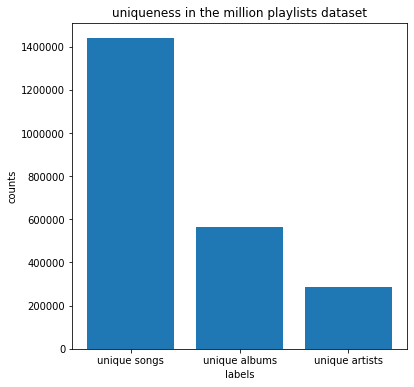

In [37]:
plt.figure(figsize=(6,6))
plt.title('uniqueness in the million playlists dataset')
plt.ylabel('counts')
plt.xlabel('labels')
plt.bar(total_key, total_info)
plt.show()

# baseline model dictionary

In [52]:
artist_ct_base = dfs.groupby(['artist_name','artist_uri','track_name',]).agg({'artist_name': 'count', 
                                                            'album_name': 'nunique',
                                                            'pid': 'nunique'})
artist_ct_base = artist_ct_base.rename(columns={'artist_name':'artist_ct',
                                     'album_name':'album_ct',
                                     'pid':'pid_ct'})
artist_ct_base = artist_ct_base.sort_values('artist_ct', ascending=False)

In [87]:
artist_ct_base = dfs.groupby(['artist_name','artist_uri','track_name','track_uri'])['artist_name'].count()
artist_ct_base

artist_name  artist_uri                             track_name                 track_uri                           
!!!          spotify:artist:1mmehjf7eHA10uHMisZGJg  a new name                 spotify:track:7LVlMTLfp0aVEHja0xcCha     1
                                                    all my heroes are weirdos  spotify:track:2nTla8UUqmBNKfcOvKc4bN     5
                                                    all the way                spotify:track:1yzykvrFwuBBjOa8wTQOGD     2
                                                    all u writers              spotify:track:2pPhbWZBm3Q6b35jV691qG    21
                                                                               spotify:track:6s9PzeJa2mYKHqcUb4PHhU    11
                                                                                                                       ..
２８１４         spotify:artist:2wBpW4bAGYVe0yJcBeCTyd  新しい日の誕生                    spotify:track:692W5bru0cz8W0qgSCsOqh    11
                              

In [120]:
artist_ct_base_df = pd.DataFrame(artist_ct_base)


In [121]:
artist_ct_base_df = artist_ct_base_df.rename(columns={'artist_name':'artist_name_ct'})

In [122]:
artist_ct_base_df=artist_ct_base_df.sort_values(['artist_name','artist_name_ct'],ascending=False)

In [123]:
artists_dic = artist_ct_base_df.reset_index()

In [124]:
artists_dic.to_csv('./output/artist_dic.csv')